## 2025-06-25 Introduction to Image Operations

### Authors
* Nicole Tin (nicolelrtin@berkeley.edu)
* (your name here)


### Overview
This Jupyter notebook is intended to demonstrate

* the general requisite knowledge to start the Skin Tone Variation Experiments

* basic functions for Numpy, Matplotlib, OpenCV

### Experiment Parameters
In general, we like to put experiment parameters at the top of the notebook so they are easy to find, and not hidden in the body of the notebook. Paths are often saved as strings, which we will pass to another package/function to read for us.  

In mac, the `..` refers to the enclosing folder, from the folder we are currently in. Since my notebook is in a sister folder to the data folder, the `..` brings me up a level, so I can refer to a different path in the parent directory. 
  
Make sure this works in your computer. 
  
You can also look at your VSCode File Explorer (the left hand bar), right-click on the file you want to select, and hit "Copy Relative Path" to paste below. "Relative" should use the convention to get the path relative to where your script (this one) is currently sitting.  

In [ ]:
# path to image
test_image_path = '../data/processed/cropped_squares/square_748_2440.jpg'

Also try the same steps, but use "Copy Path". This path uses the hard-coded, absolute path that it is located on your whole computer. The reason why we don't like this - if you move the project folder, your paths will be messed up!

### Preparations

In [2]:
# --- Imports

# Standard library
import random

# External packages
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Internal library
import formatting

### Reading and Displaying Images

There are a number of different packages and libraries to load in a file as an image. OpenCV (cv), Matplotlib (plt), and Pillow (PIL, not used here) are all different Python libraries that can be used to load/read an image. Images are loaded in as **arrays**, like a numpy array or matrix. Both opencv and matplotlib treat images as arrays, and so most manipulations to images are very similar to array manipulations.
  
**Loading in an image:**  
The function call for opencv and matplotlib are the same (matplotlib calls opencv "under the hood"). It follows the format of: 
`cv.imread(...)`  
* `cv` is the package alias  
* `imread` is the function name 
* in place of the ellipse, we place the file path as a string, in single _or_ double quotes, both work 
 
Below, try using both opencv and matplotlib. They're pretty much the same. I repeat the variable at the end of the cell so we can see its contents.

In [ ]:
# Load in image into an array
img = ...

img

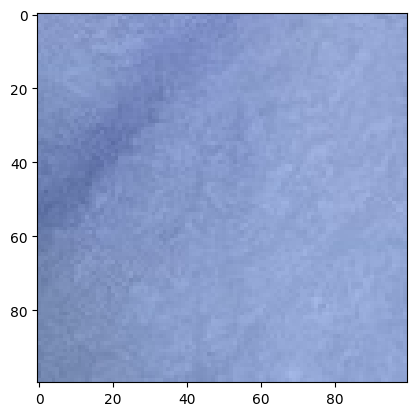

In [46]:
# Plot image in notebook
plt.imshow(img)

The shape of an image (or an array) is stored as an attribute of the variable. The shape is represented as a tuple of (height, width, and color).  
Below, print out the shape of the image. The answer here should be (100, 100, 3).

In [ ]:
# Get the dimensions of the image
# The image is (H, W, C); height, width, (color) channels
image_shape = ...

image_shape

(100, 100, 3)

For some reason, images tend to be read-in with the colorspace BGR (blue, green, red) format. Let's change this to be in what we are used to (RGB).

### Convert Colorspaces
The channels of the image (in this case, C=3) represent the number of vectors used in coloring the image. Converting the colorspace of an image involves changing the values of the array.  
  
It is not difficult to do this manually, but it is common enough that OpenCV has a function that will do it for us: `cv.cvtColor`. Implement this function, converting our `img` from BGR to RGB. Write this in the `rgb_img` variable.

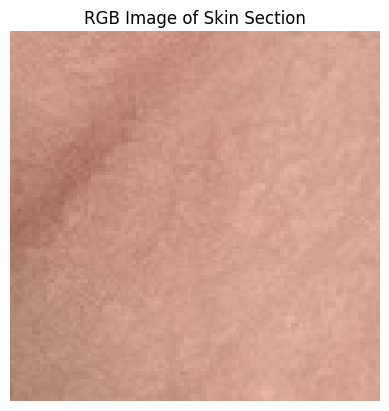

In [ ]:
# Convert image from BGR to RGB
rgb_img = ...

# Show/plot image
plt.imshow(rgb_img)

# Plot image without axes
plt.axis(False)

# Give the plot a title
plt.title('RGB Image of Skin Section')

plt.show()

Great, now we have an image that looks familiar to us. 
  
### Array Slicing
I want to switch gears for a moment to talk about matrix operations, or more specifically, slicing an array. Since we are talking about images, its most convenient to think of slicing as cropping an array (for the height and width) or as isolating the color channels. 
    
In python, when working with lists or arrays, the colon `:`, essentially means "all" or "all indexes.  
Thus, `rgb_image` is the same as `rgb_image[:, :, :]` ; or, return all the values in the height, width, and channel indexes. 
  

If we want to crop the image so that we only get the upper left quadrant, we could slice the array as `rgb_image[:50, :50, :]`, meaning we want all the values up to (*but not including*) the 50th index of the height and width channels. If we were to plot this, you can see the axis changing from a 100 x 100 image to 50 x 50.  
 
  
Try slicing the array to show only one of the three color channels in the image.   
**Hint**: Python is a 0-indexed system, meaning we start counting from 0, not one. Because we have an RGB image, the 0-th index corresponds to the Red channel, and the 1st index corresponds to Green.   
**Hint 2:** Dont worry if the resulting plot is a color other than what you expect.

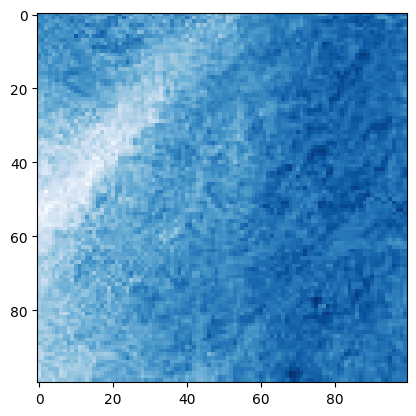

In [ ]:
# Upper left quadrant
upper_left_quadrant = rgb_img[...]

# Image with only blue values
blue_values_in_image = ...

# Show/plot image
plt.imshow(blue_values_in_image)

re Hint 2: Matplotlib likes to plot images/arrays in a distinct `colormap` that allows us to perceptually vizualize the values of an image. If it resorted to black and white for all 2D images, it can be difficult to tell value = 10 from value = 20. We can change the colormap that matplotlib uses to display the array, without actually changing anything about the array (just how it is plotted in an image).  
  
Try modifying the cell below to see how different colormaps render.  

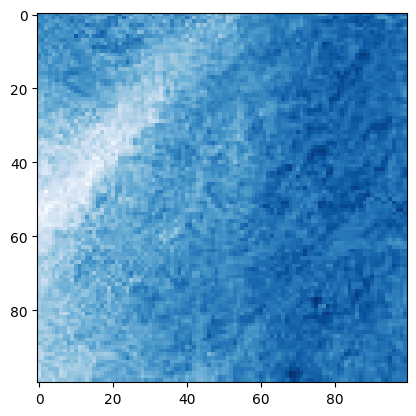

In [ ]:
plt.imshow(blue_values_in_image, cmap=...)

### Create a histogram of the values in the image

The image is represented by array of intensity values, ranging from 0-255. This is true for both RGB-ranged values and for black and white images. We can convert the 3D image (RGB) into a 2D (grayscale) and plot the distribution of intensity values. 

In [ ]:
# First convert the image to grayscale
grayscale_image = ...

# preview variable
grayscale_image

array([[171, 168, 164, ..., 175, 174, 177],
       [167, 169, 162, ..., 173, 169, 166],
       [165, 168, 169, ..., 175, 179, 179],
       ...,
       [134, 150, 147, ..., 174, 175, 176],
       [136, 149, 147, ..., 173, 174, 175],
       [145, 144, 146, ..., 175, 175, 174]], dtype=uint8)

We can use matplotlib to create a graph of the histogram of values in one line:

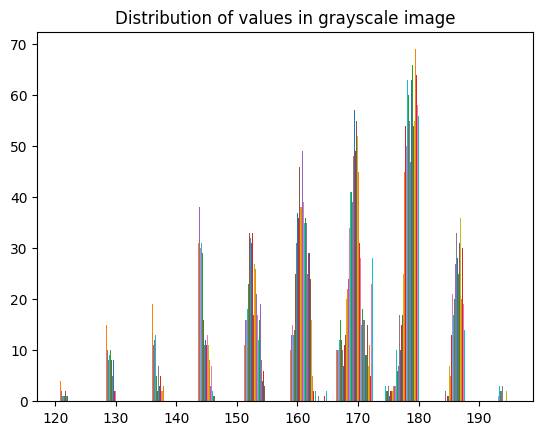

In [21]:
# Create a histogram from the array
plt.hist(grayscale_image)

# Give plot a title
plt.title('Distribution of values in grayscale image')

# Remove preview of intermediate values
plt.show()

We can also binarize the image to show values above (or under) an intensity value. We can do this simply by using `>`, `<`, `>=`, `<=` operations.

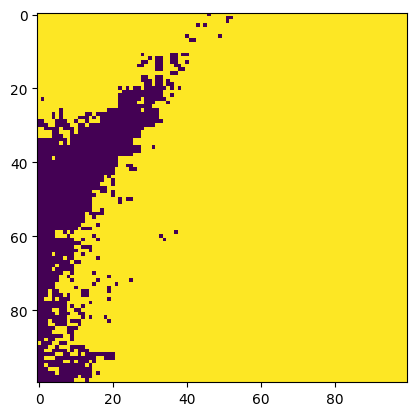

In [52]:
# Set threshold
threshold = 150

# Yield True/False for each value in the grayscale image
thresholded_grayscale_image = grayscale_image > threshold

# Show binarized image
# Automatically chooses a colorscheme that is perceptually distinct 
plt.imshow(thresholded_grayscale_image)

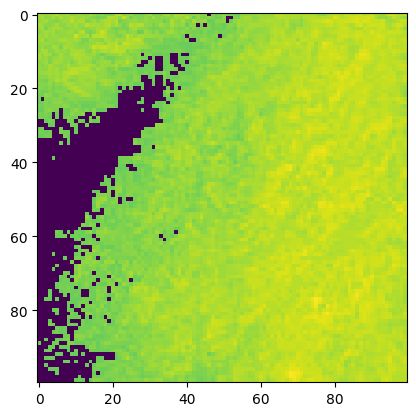

In [ ]:
# We can matrix multiply the binary mask (2D) with the grayscale image (2D)
# This yields only grayscale values where thresholded image is True

# Automatically chooses a colorscheme that is perceptually distinct 
plt.imshow(thresholded_grayscale_image * grayscale_image)

In [56]:
# This effectively does the same thing for rgb images, and in less variables
# Values that are False are set to 0

rgb_masking = (rgb_img > threshold) * rgb_img

rgb_masking

array([[[207, 158,   0],
        [204, 155,   0],
        [200, 151,   0],
        ...,
        [210, 163,   0],
        [209, 162,   0],
        [212, 165,   0]],

       [[203, 154,   0],
        [205, 156,   0],
        [198,   0,   0],
        ...,
        [208, 161,   0],
        [204, 157,   0],
        [201, 154,   0]],

       [[201, 152,   0],
        [204, 155,   0],
        [205, 156,   0],
        ...,
        [210, 163,   0],
        [214, 167,   0],
        [214, 167,   0]],

       ...,

       [[165,   0,   0],
        [181,   0,   0],
        [178,   0,   0],
        ...,
        [210, 162,   0],
        [211, 163,   0],
        [212, 164,   0]],

       [[167,   0,   0],
        [180,   0,   0],
        [178,   0,   0],
        ...,
        [209, 161,   0],
        [210, 162,   0],
        [211, 163,   0]],

       [[176,   0,   0],
        [175,   0,   0],
        [177,   0,   0],
        ...,
        [211, 163,   0],
        [211, 163,   0],
        [210, 162,   0]]

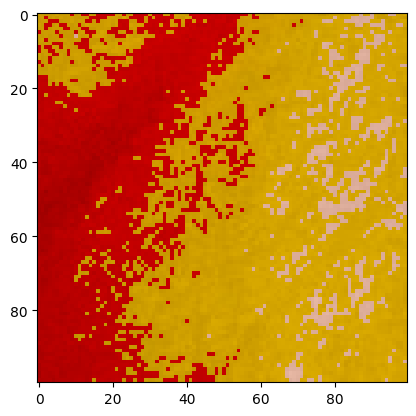

In [40]:
# Automatically chooses a colorscheme that is perceptually distinct 
plt.imshow(rgb_masking)